Example 1: Ads Data 

Replace missing values for EstimatedSalary with its mean value 

Find: 
(i)   mean 
(ii)  median 
(iii) max
(iv)  min 

In [2202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline


In [2203]:
# Importing Ads Data

csv_path = ('/Users/antonioelias/Desktop/MOOCs/Python Coding Bootcamp/Data Science Libs/ads.csv')

ads_data = pd.read_csv(csv_path, delimiter=';')
ads_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,NaN,20000.0,0
2,15668575,Female,-888.0,43000.0,0
3,15603246,Female,27.0,NaN,0
4,15804002,Male,19.0,76000.0,0


In [2204]:
# Summary Statistics

ads_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,394.000000,394.000000,400.000000
mean,1.569154e+07,30.695431,69309.652284,0.357500
std,7.165832e+04,81.249427,34408.554232,0.479864
min,1.556669e+07,-888.000000,-999.000000,0.000000
25%,1.562676e+07,29.000000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,87750.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [2205]:
# Inspecting columns for NaN/NA values and dtypes

ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           395 non-null    object 
 2   Age              394 non-null    float64
 3   EstimatedSalary  394 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [2206]:
# Counting Null values

missing_val_count_by_column = ads_data.isnull().sum()
mask = missing_val_count_by_column > 0
missing_series = missing_val_count_by_column[mask]

missing_series

Gender             5
Age                6
EstimatedSalary    6
dtype: int64

In [2207]:
# Filling in missing values with EstimatedSalary mean
mean_salary = ads_data.loc[:, 'EstimatedSalary'].mean()
ads_data.loc[:, 'EstimatedSalary'] = ads_data.loc[:, 'EstimatedSalary'].replace(np.nan, mean_salary)

salary_missing_values = ads_data.loc[:, 'EstimatedSalary'].isnull().sum()

print('\nMean EstimatedSalary: {:.2f}'.format(mean_salary))
print('\nMissing values for EstimatedSalary: {}'.format(salary_missing_values))



Mean EstimatedSalary: 69309.65

Missing values for EstimatedSalary: 0


In [2208]:
# Grouping data by Gender and comparing EstimatedSalary metrics

metrics = ['mean', 'median', 'max', 'min']

gender_salary = ads_data.groupby('Gender')['EstimatedSalary'].agg(metrics)
gender_salary

,mean,median,max,min
Gender,,,,
Female,72067.404286,70000.000000,149000.0,15000.0
Male,67279.962125,69654.826142,150000.0,-999.0


Example 2: Tips Data

In [2209]:
# Importing Tips Data

csv_path = ('/Users/antonioelias/Desktop/MOOCs/Python Coding Bootcamp/Data Science Libs/tips.csv')

tips_data = pd.read_csv(csv_path, index_col=0)
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2210]:
# Summary Statistics 

tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [2211]:
# Inspecting columns for NaN/NAs and dtypes

tips_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [2212]:
# Inspecting object type columns

In [2213]:
tips_data.loc[:, 'sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [2214]:
tips_data.loc[:, 'smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [2215]:
tips_data.loc[:, 'day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [2216]:
tips_data.loc[:, 'time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [2217]:
# Total sales

total_sales = tips_data.total_bill.sum()

# Total tips

total_tips = tips_data.tip.sum()

print('\nTotal Sales: ${:.2f}'.format(total_sales))
print('\nTotal Tips: ${:.2f}'.format(total_tips))


Total Sales: $4827.77

Total Tips: $731.58


In [2218]:
# Comparing Lunch vs Dinner Total Sales - Part 1 

# Method 1: 

lunch_mask = tips_data.time == ('Lunch')
lunch_tips_data = tips_data[lunch_mask]
total_sales_lunch = lunch_tips_data.total_bill.sum()

dinner_mask = tips_data.time == ('Dinner')
dinner_tips_data = tips_data[dinner_mask]
total_sales_dinner = dinner_tips_data.total_bill.sum()

print('\nTotal Dinner Sales: $ {:.2f}'.format(total_sales_dinner))
print('\nTotal Lunch Sales: $ {:.2f}'.format(total_sales_lunch))

# Method 2:

bill_time = tips_data.groupby('time')['total_bill'].sum()
bill_time


Total Dinner Sales: $ 3660.30

Total Lunch Sales: $ 1167.47


time
Dinner    3660.30
Lunch     1167.47
Name: total_bill, dtype: float64

In [2219]:
# Comparing Lunch vs Dinner Total Sales - Part 2

# Method 1:
 
mean_lunch_sales = lunch_tips_data.total_bill.mean()
mean_dinner_sales = dinner_tips_data.total_bill.mean()

print('\nMean Dinner Sales: $ {:.2f}'.format(mean_dinner_sales))
print('\nMean Lunch Sales: $ {:.2f}'.format(mean_lunch_sales))

# Method 2: 

mean_sales_time = tips_data.groupby('time')['total_bill'].mean()
mean_sales_time


Mean Dinner Sales: $ 20.80

Mean Lunch Sales: $ 17.17


time
Dinner    20.797159
Lunch     17.168676
Name: total_bill, dtype: float64

Example 3: Ads Data
- Salary Distribution

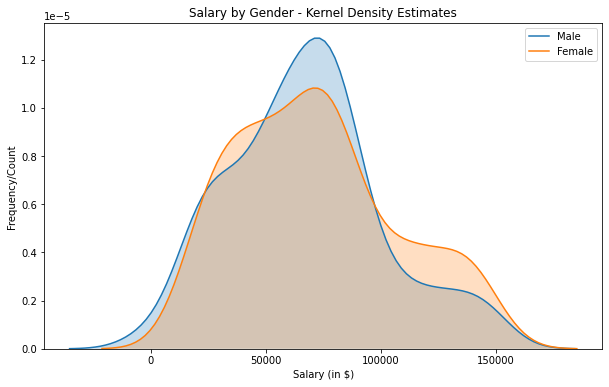

In [2220]:
# Cleaning Age Date

f_mask = ads_data.Gender == 'Female'
f_data = ads_data[f_mask]
f_mean_salary = f_data.EstimatedSalary.mean()
f_data.loc[:, 'EstimatedSalary'] = f_data.loc[:, 'EstimatedSalary'].replace([np.nan, -888, -888.00], f_mean_salary)

m_mask = ads_data.Gender == 'Male'
m_data = ads_data[m_mask]
m_mean_salary = m_data.EstimatedSalary.mean()
m_data.loc[:, 'EstimatedSalary'] = m_data.loc[:, 'EstimatedSalary'].replace([np.nan, -888, -888.00], m_mean_salary)

mf_data = pd.concat([m_data, f_data])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=m_data['EstimatedSalary'], shade=True, label='Male')
sns.kdeplot(data=f_data['EstimatedSalary'], shade=True, label='Female')

plt.title('Salary by Gender - Kernel Density Estimates')
plt.xlabel('Salary (in $)')
plt.ylabel('Frequency/Count')
plt.legend()
plt.show()


Example 4: Iris Data
- Scatter Plots 

In [2221]:
# Importing Iris Data

# Note: Used different csv file (couldn't read from the one provided in class...)

# Used this one instead : https://www.kaggle.com/uciml/iris?select=Iris.csv

csv_path = ('/Users/antonioelias/Desktop/MOOCs/Python Coding Bootcamp/Data Science Libs/iris.csv')

iris_data = pd.read_csv(csv_path, delimiter=',', index_col='Id')
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [2222]:
# Inspecting for NaN/NA and column dtypes 

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.0+ KB


In [2225]:
# Species 

iris_data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

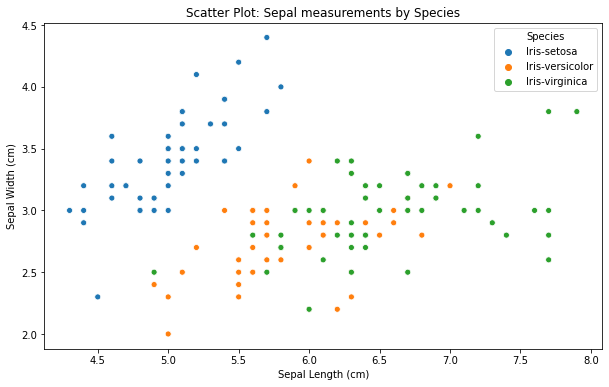

In [2228]:
# Sepal Scatter Plot 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_data['SepalLengthCm'], y=iris_data['SepalWidthCm'], hue=iris_data['Species'])

plt.title('Scatter Plot: Sepal measurements by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.show()

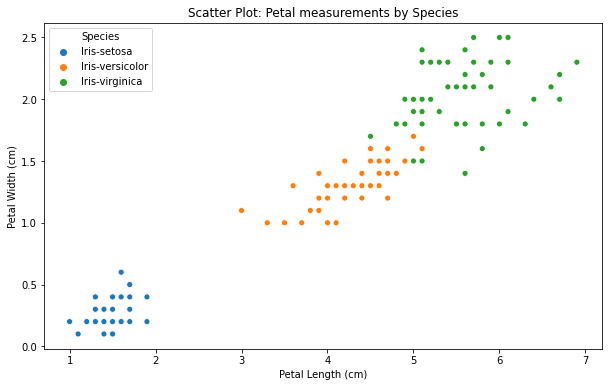

In [2230]:
# Petal Scatter Plot 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_data['PetalLengthCm'], y=iris_data['PetalWidthCm'], hue=iris_data['Species'])

plt.title('Scatter Plot: Petal measurements by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.show()